# **1. EXPLORATORY DATA ANALYSIS**

In [11]:
#we import the necessary libraries for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import warnings

## **Data Understanding**

## Domain Knowledge

Variables to be used:

**Demographics**
Age
Income

**Lifestyle**
Smoking
Obesity
Diet
Physical activity
Exercise hours
Alcohol consumption
Sleep hours

**Health**
Cholesterol
Blood pressure
Diabetes
BMI




              

In [12]:
#we load our dataset into a dataframe and preview the dataset
data = pd.read_csv("Data.csv")
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


### Dataset Overview

The dataset contains data for 8,763 individuals, with 26 columns representing different attributes. Here’s a summary of key aspects:

- **Data Types and Presence:**
  - There are both numerical and categorical variables.
  - All columns have complete data for all entries (no missing values).

- **Attributes:**
  - **Patient ID:** Unique identifier for each patient.
  - **Demographics:** Age, Sex, Income, Country, Continent, Hemisphere.
  - **Health Measures:** Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Obesity, Alcohol Consumption, Previous Heart Problems, Medication Use, Stress Level, BMI, Triglycerides.
  - **Lifestyle:** Smoking, Exercise Hours Per Week, Diet, Sedentary Hours Per Day, Physical Activity Days Per Week, Sleep Hours Per Day.


### Key Considerations:

- **Target Variable Clarification:** We need to determine if the "Heart Attack Risk" is indeed the target variable, or if we should predict hypertension specifically (possibly using blood pressure or a derived indicator).
- **Feature Engineering:** We may need to transform some features, like Blood Pressure, which is a categorical variable. Understanding its categories or converting it to a numerical scale could be necessary.
- **Categorical Data Encoding:** Columns like Sex, Blood Pressure, Diet, Country, Continent, and Hemisphere will require encoding to numerical formats suitable for modeling.
- **Scaling and Normalization:** Numerical features like Age, Cholesterol, Heart Rate, etc., might need scaling to improve model performance.

### Proposed Next Steps:

1. **Clarify the Target Variable:** Confirm if we should focus on the "Heart Attack Risk" for modeling or another variable related to hypertension.
2. **Exploratory Data Analysis (EDA):** Dive deeper into the distribution of variables, relationships between features, and correlation with the target variable.
3. **Data Preprocessing:** Implement encoding, handling of categorical data, and feature scaling.
4. **Model Selection and Training:** Based on the data understanding and preprocessing results, select appropriate models for testing.

In [13]:
# we check the nature of values in the 'Blood Pressure' column
unique_data = data['Blood Pressure'].unique()
unique_data

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

To generate the synthetic target variable "Hypertension" based on the "Blood Pressure" column, we need to define the criteria for hypertension. Commonly, hypertension is diagnosed based on blood pressure readings:

- **Normal:** Systolic < 120 and Diastolic < 80
- **Elevated:** Systolic 120-129 and Diastolic < 80
- **Hypertension Stage 1:** Systolic 130-139 or Diastolic 80-89
- **Hypertension Stage 2:** Systolic >= 140 or Diastolic >= 90

However, your dataset's "Blood Pressure" seems to be categorized, not in numerical format. We'll first need to examine the unique values in this column to understand how it's categorized. Then, we can define a mapping to synthetic hypertension statuses.

Let's start by examining the unique categories in the "Blood Pressure" column:

The "Blood Pressure" values are in the format "Systolic/Diastolic" as numerical strings. To generate the "Hypertension" column, we will:

1. Parse these strings to extract systolic and diastolic pressure values.
2. Apply the criteria to determine hypertension:
   - **Normal:** Not hypertensive
   - **Elevated and above (Systolic 140+ or Diastolic 90+):** Hypertensive

Let's implement these steps to create the new "Hypertension" column based on the criteria mentioned:

The new "Hypertension" column has been successfully created based on the "Blood Pressure" values. A `1` indicates that the individual is hypertensive (either systolic >= 140 or diastolic >= 90), and a `0` indicates they are not hypertensive.

This synthetic column will now serve as the target variable for our predictive models.

In [14]:
#we create a function to determine hypertension based on blood pressure readings
def classify_hypertension(bp_reading):
    systolic, diastolic = map(int, bp_reading.split('/'))
    if systolic >= 140 or diastolic >= 90:
        return 1  # Hypertensive
    else:
        return 0  # Not hypertensive

#we use the function in the 'Blood Pressure' column to create 'Hypertension' column
data['Hypertension'] = data['Blood Pressure'].apply(classify_hypertension)

#we preview the data to confirm the creation of the new column
data[['Blood Pressure', 'Hypertension']].head()


,Blood Pressure,Hypertension
0,158/88,1
1,165/93,1
2,174/99,1
3,163/100,1
4,91/88,0


In [15]:
#we filter the dataset to include only rows where the Country is either 'Nigeria' or 'South Africa'
df = data[data['Country'].isin(['Nigeria', 'South Africa'])]

#we check the first few rows of the filtered dataset to verify
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Hypertension
10,HSD6283,73,Female,373,107/69,97,1,1,1,0,...,50030,22.867911,469,0,4,South Africa,Africa,Southern Hemisphere,0,0
32,ENK3334,27,Male,321,111/91,50,1,0,1,1,...,53345,34.196492,558,7,8,Nigeria,Africa,Northern Hemisphere,1,1
58,OFU9592,74,Male,285,151/85,109,1,1,1,0,...,35855,39.783909,682,6,10,Nigeria,Africa,Northern Hemisphere,0,1
62,YTR1728,90,Female,139,179/93,85,0,1,1,1,...,73167,28.277305,628,7,9,South Africa,Africa,Southern Hemisphere,0,1
72,SOH9843,22,Male,398,174/93,82,1,1,1,0,...,259754,39.413213,327,3,6,Nigeria,Africa,Northern Hemisphere,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,AES9275,40,Male,383,158/70,51,1,1,1,0,...,56588,31.438928,250,3,10,Nigeria,Africa,Northern Hemisphere,0,1
8739,TRA1650,74,Female,306,125/101,84,0,0,1,1,...,80750,21.279901,418,0,5,South Africa,Africa,Southern Hemisphere,1,1
8740,BLA5043,59,Male,148,149/76,108,1,1,1,0,...,97001,26.334834,500,7,6,South Africa,Africa,Southern Hemisphere,0,1
8745,ASE6283,80,Male,144,176/82,57,1,1,1,0,...,251796,25.000400,59,2,10,South Africa,Africa,Southern Hemisphere,1,1


The dataset has been successfully filtered to include only entries from Nigeria and South Africa. We now have a focused dataset for the countries of interest in this project.

In [16]:
#we check the nature of the data in the columns

df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Hypertension'],
      dtype='object')

When preparing this dataset, especially in a health-related context like hypertension prediction, it's essential to consider the relevance, predictiveness, and privacy of each feature. Here are some columns that could potentially be considered less useful for our specific modeling goal, along with justifications for their removal:


1. **Continent, Hemisphere**:
   - **Justification:** These geographical indicators are redundant and do not provide additional value in predicting hypertension within this specific subset.

2. **Heart Attack Risk**:
   - **Justification:** Although related to cardiovascular health, this feature is an outcome variable of another health condition that may not necessarily contribute to predicting hypertension directly. Our target is specifically hypertension, which might not correlate directly with heart attack risk.

3. **Family History**:
   - **Justification:** This might be a borderline case. If "Family History" specifically refers to a history of heart disease rather than hypertension, it might not be as relevant. However, if it encompasses a family history of hypertension, it would be crucial to retain.


We also remove: 'Patient ID', 'Heart Rate', 'Previous Heart Problems',  'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Triglycerides'

In [17]:
#we drop the aforementioned columns
df2 = df.copy()
df2.drop(['Patient ID','Heart Rate', 'Family History','Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day','Triglycerides', 'Continent', 'Hemisphere', 'Heart Attack Risk'], axis=1, inplace=True)

In [18]:
#we preview our new dataset
df2

,Age,Sex,Cholesterol,Blood Pressure,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Hypertension
10,73,Female,373,107/69,1,1,0,1,16.841988,Average,50030,22.867911,0,4,South Africa,0
32,27,Male,321,111/91,1,1,1,0,0.759440,Unhealthy,53345,34.196492,7,8,Nigeria,1
58,74,Male,285,151/85,1,1,0,1,5.575382,Unhealthy,35855,39.783909,6,10,Nigeria,1
62,90,Female,139,179/93,0,1,1,1,1.713099,Average,73167,28.277305,7,9,South Africa,1
72,22,Male,398,174/93,1,1,0,0,18.422302,Average,259754,39.413213,3,6,Nigeria,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,40,Male,383,158/70,1,1,0,1,10.267038,Healthy,56588,31.438928,3,10,Nigeria,1
8739,74,Female,306,125/101,0,1,1,0,14.479625,Unhealthy,80750,21.279901,0,5,South Africa,1
8740,59,Male,148,149/76,1,1,0,1,11.987307,Healthy,97001,26.334834,7,6,South Africa,1
8745,80,Male,144,176/82,1,1,0,1,18.220469,Healthy,251796,25.000400,2,10,South Africa,1


In [19]:
#we check the structure of this cleaned data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 10 to 8749
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              873 non-null    int64  
 1   Sex                              873 non-null    object 
 2   Cholesterol                      873 non-null    int64  
 3   Blood Pressure                   873 non-null    object 
 4   Diabetes                         873 non-null    int64  
 5   Smoking                          873 non-null    int64  
 6   Obesity                          873 non-null    int64  
 7   Alcohol Consumption              873 non-null    int64  
 8   Exercise Hours Per Week          873 non-null    float64
 9   Diet                             873 non-null    object 
 10  Income                           873 non-null    int64  
 11  BMI                              873 non-null    float64
 12  Physical Activity Days Pe

In [20]:
#we check the shape of the data
rows, columns = df2.shape
print(f"The dataset has {columns} columns and {rows} rows")

The dataset has 16 columns and 873 rows


## **Data Cleaning**

**a. Missing & Duplicate Values**

In [21]:
#we create a function to check for missing or duplicated data
def check_missing_duplicated(df):
    missing = df.isnull().sum()
    duplicated = df.duplicated().sum()

    print("Missing Values:")
    print(missing)
    print("\nDuplicated Rows:")
    print(f"Total duplicated rows: {duplicated}")

check_missing_duplicated(df2)

Missing Values:
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Diabetes                           0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Income                             0
BMI                                0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Hypertension                       0
dtype: int64

Duplicated Rows:
Total duplicated rows: 0


We can create a function named `check_missing_duplicated` that will perform checks for missing and duplicated data in a DataFrame. This function will:

1. **Check for Missing Data:**
   - Calculate the total number of missing values per column.
   - Return a summary of columns with missing values (if any).

2. **Check for Duplicated Data:**
   - Count the number of duplicated rows in the DataFrame.
   - Optionally, display some examples of duplicated rows (if requested).

Here’s how the function will be structured:

- **Input:** DataFrame.
- **Output:** Reports on missing data and duplicated data.

Let's write this function in the Python code interpreter.

The `check_data_quality` function has been successfully applied to the `df2` DataFrame. Here are the results:

- **Missing Data:** There are no missing values in any of the columns.
- **Duplicated Data:** There are no duplicated rows in the dataset.

This indicates that the data is clean in terms of missing and duplicated entries, which is excellent for moving forward with analysis or modeling.

**b. Outliers**

We check for outliers in:
Age , Cholesterol, Exercise Hours Per Week	, Income ,  BMI

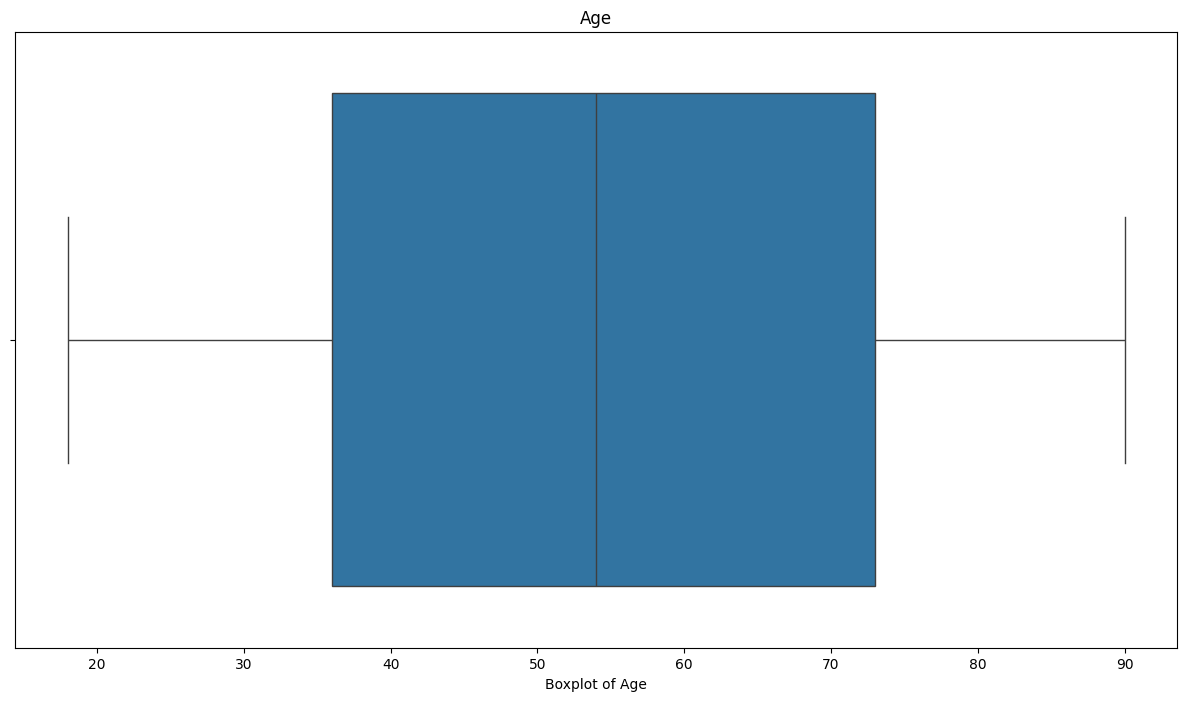

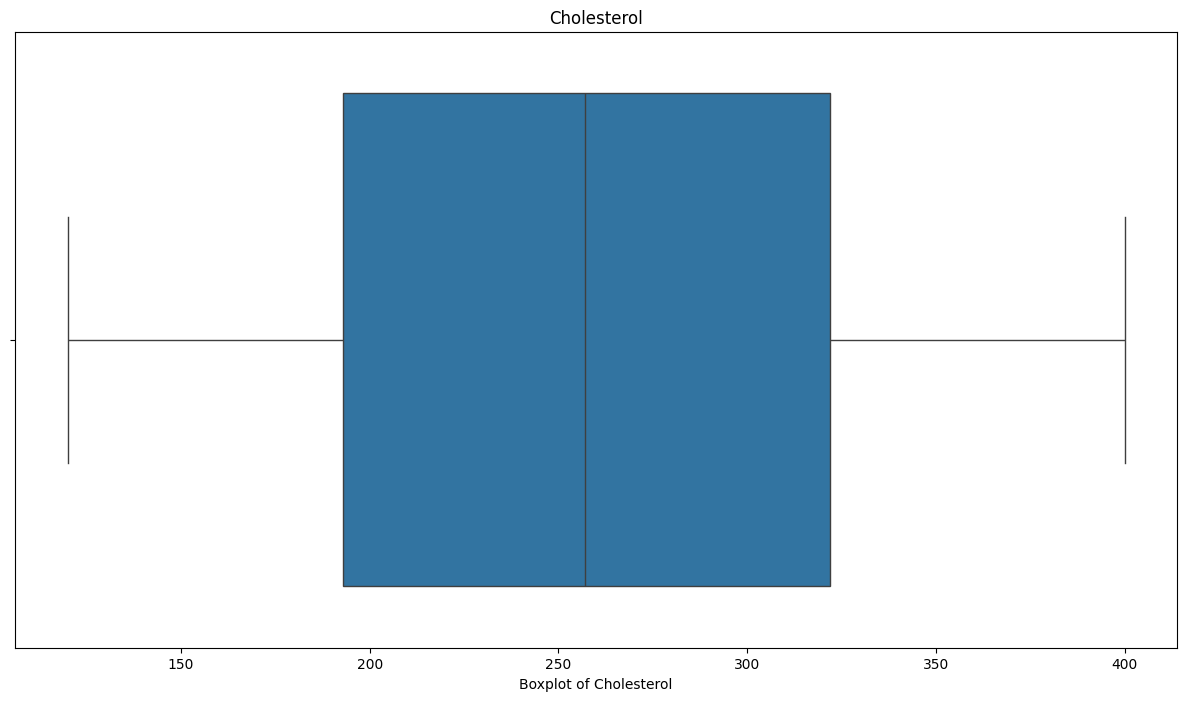

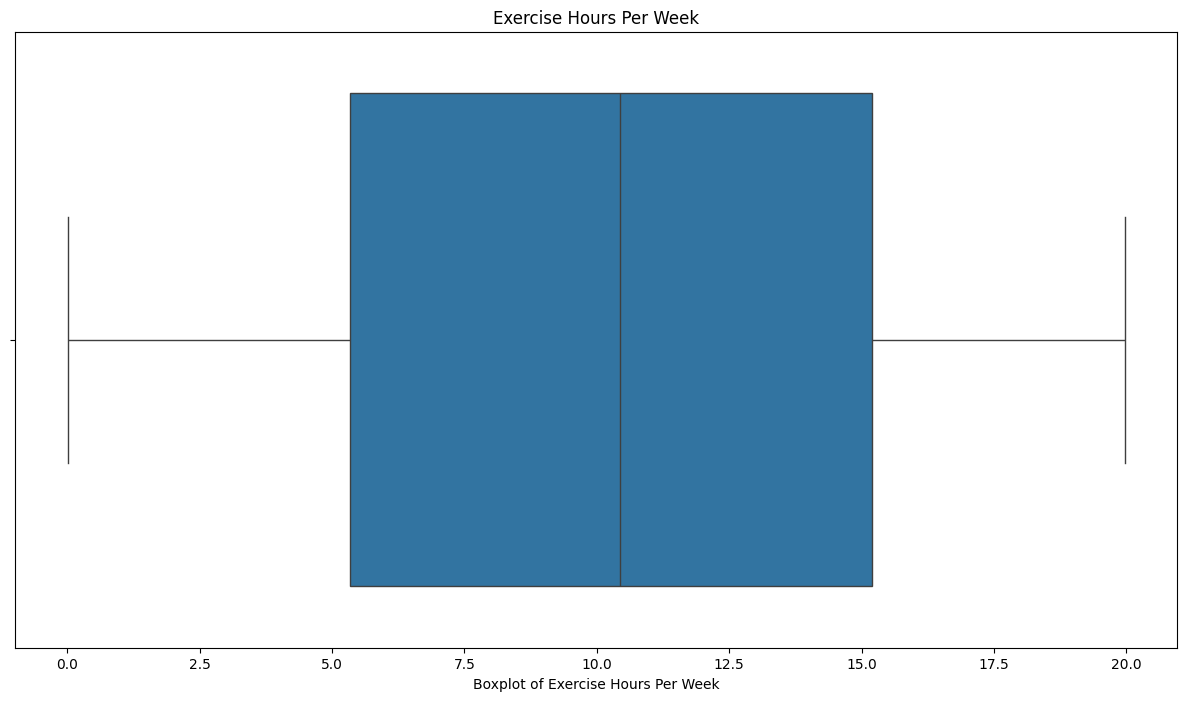

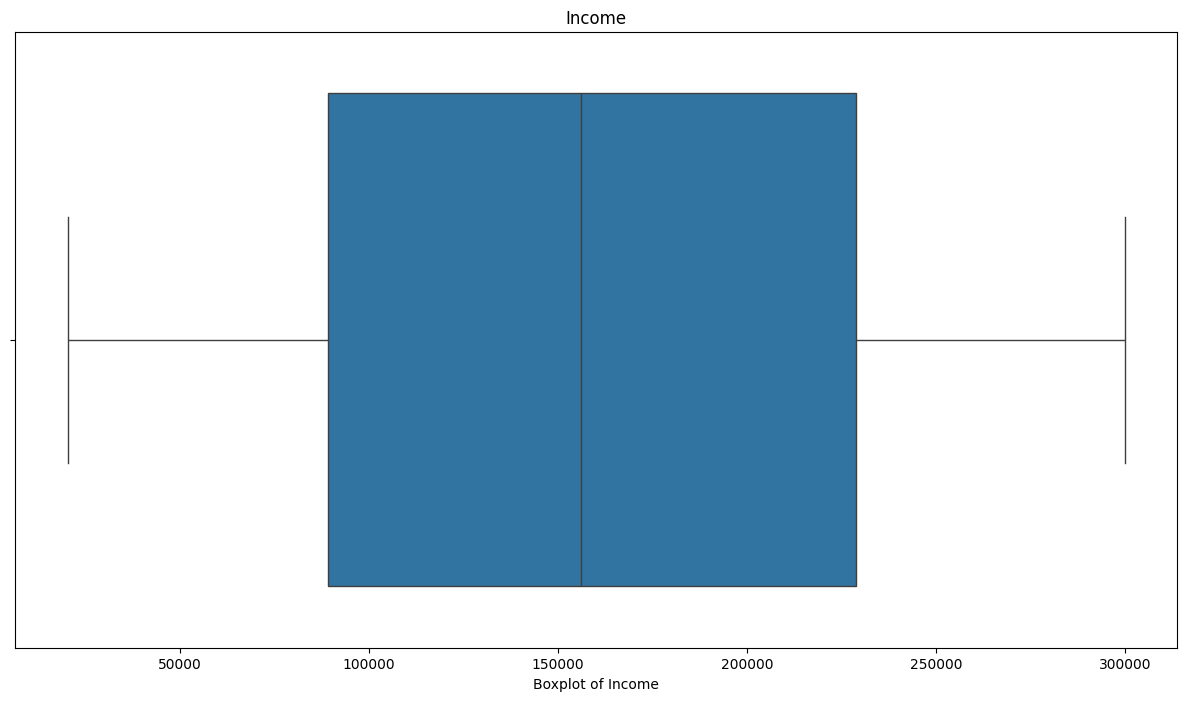

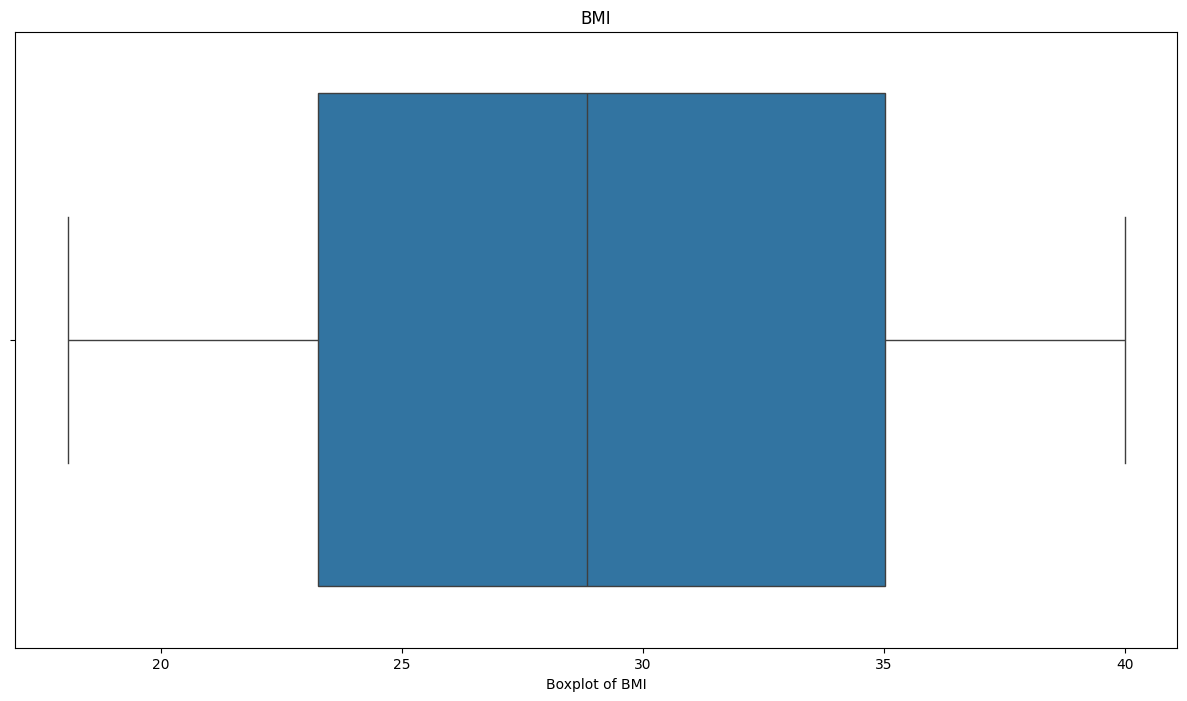

In [22]:
def plot_boxplots(series, title='Boxplot', xlabel='Variable'):

    plt.figure(figsize=(15, 8))
    sns.boxplot(x=series)
    plt.title(title)
    plt.xlabel(xlabel)

    plt.show()

#we implement the function
plot_boxplots(df2['Age'], 'Age', 'Boxplot of Age')
plot_boxplots(df2['Cholesterol'], 'Cholesterol', 'Boxplot of Cholesterol')
plot_boxplots(df2['Exercise Hours Per Week'], 'Exercise Hours Per Week', 'Boxplot of Exercise Hours Per Week')
plot_boxplots(df2['Income'], 'Income', 'Boxplot of Income')
plot_boxplots(df2['BMI'], 'BMI', 'Boxplot of BMI')

In [23]:
#we check the summary statistics
df2.describe()

,Age,Cholesterol,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Hypertension
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,54.781214,257.833906,0.648339,0.908362,0.505155,0.595647,10.213949,158537.833906,29.044729,3.415808,7.065292,0.690722
std,21.073789,78.774391,0.477762,0.288680,0.500260,0.491048,5.689454,80017.823147,6.539210,2.307264,1.969748,0.462461
min,18.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.010474,20328.000000,18.059471,0.000000,4.000000,0.000000
25%,36.000000,193.000000,0.000000,1.000000,0.000000,0.000000,5.349182,89167.000000,23.252114,1.000000,5.000000,0.000000
50%,54.000000,257.000000,1.000000,1.000000,1.000000,1.000000,10.443749,156134.000000,28.844119,3.000000,7.000000,1.000000
75%,73.000000,322.000000,1.000000,1.000000,1.000000,1.000000,15.199945,228889.000000,35.018544,5.000000,9.000000,1.000000
max,90.000000,400.000000,1.000000,1.000000,1.000000,1.000000,19.963096,299810.000000,39.997211,7.000000,10.000000,1.000000


In [24]:
#we check the count of unique values

df2.nunique()

Age                                 73
Sex                                  2
Cholesterol                        273
Blood Pressure                     796
Diabetes                             2
Smoking                              2
Obesity                              2
Alcohol Consumption                  2
Exercise Hours Per Week            873
Diet                                 3
Income                             872
BMI                                873
Physical Activity Days Per Week      8
Sleep Hours Per Day                  7
Country                              2
Hypertension                         2
dtype: int64

## **Univariate Analysis**

**a. Hypertension Prevalence**

In [25]:
#we check the count of hypertension cases
df2['Hypertension'].value_counts()

Hypertension
1    603
0    270
Name: count, dtype: int64

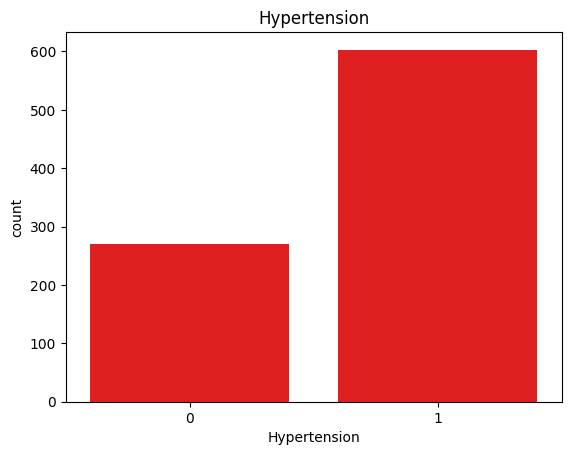

In [26]:
#we plot this in a countplot
sns.countplot(x='Hypertension', data=df2, color='red')
plt.title('Hypertension')
plt.show()

**b. Count plots for all other binary variables: Sex, Diabetes, Smoking, Obesity, Alcohol Consumption, Diet, Country**

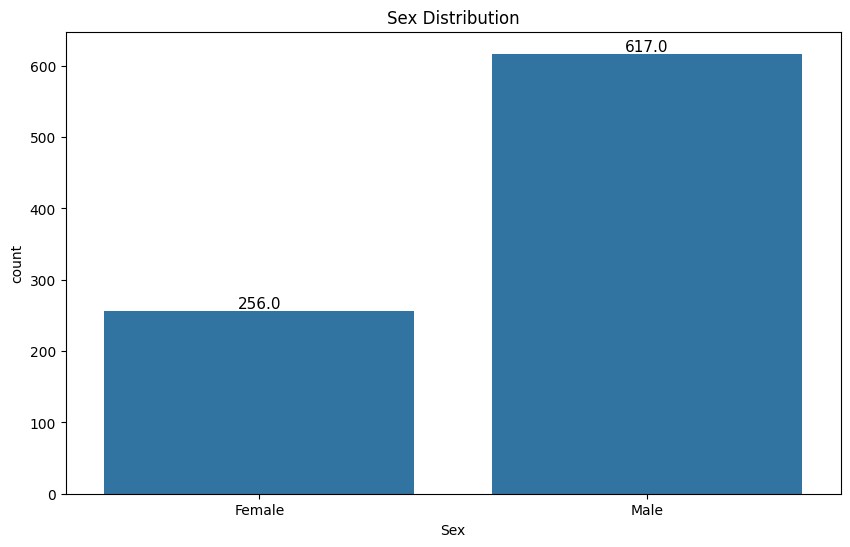

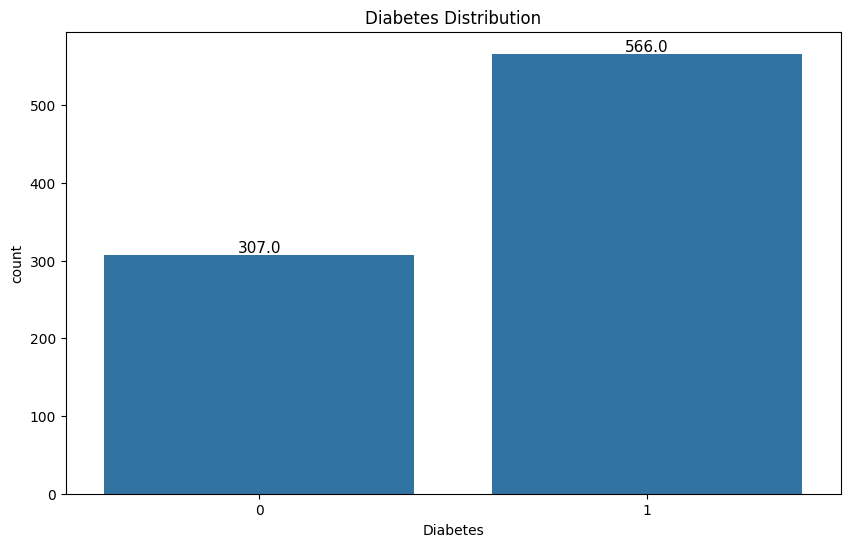

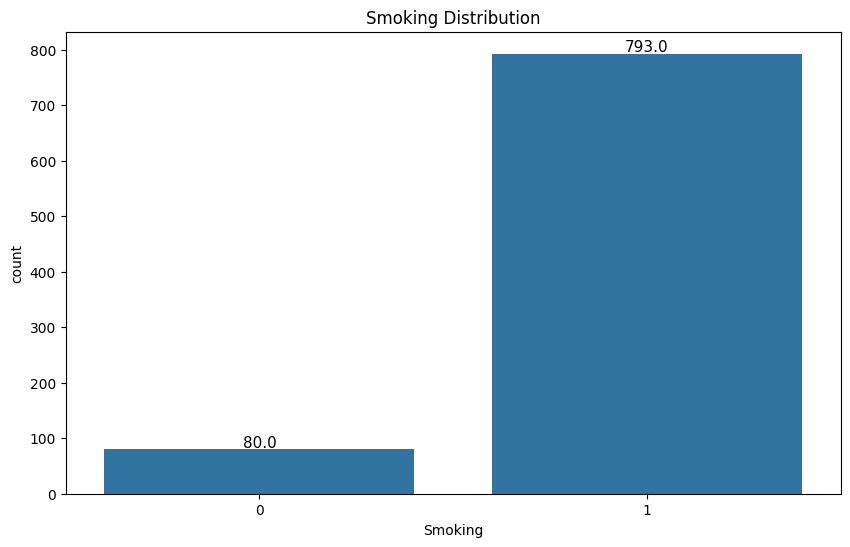

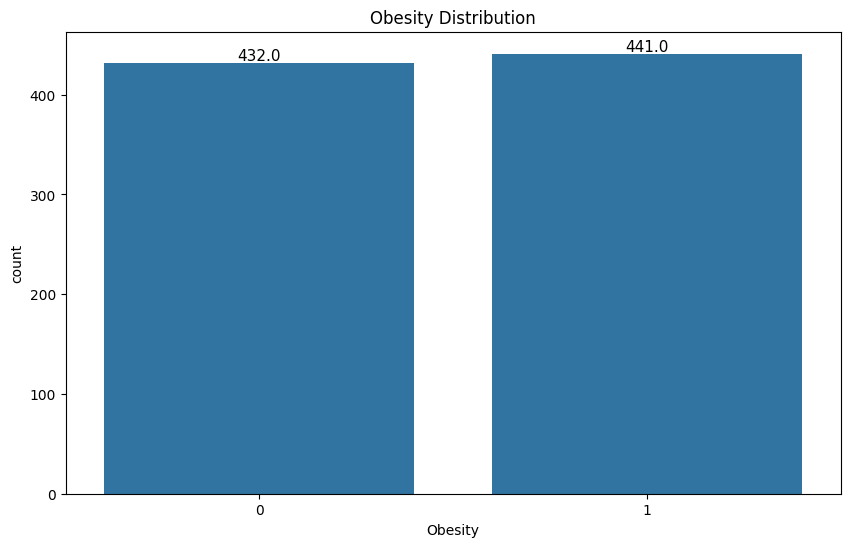

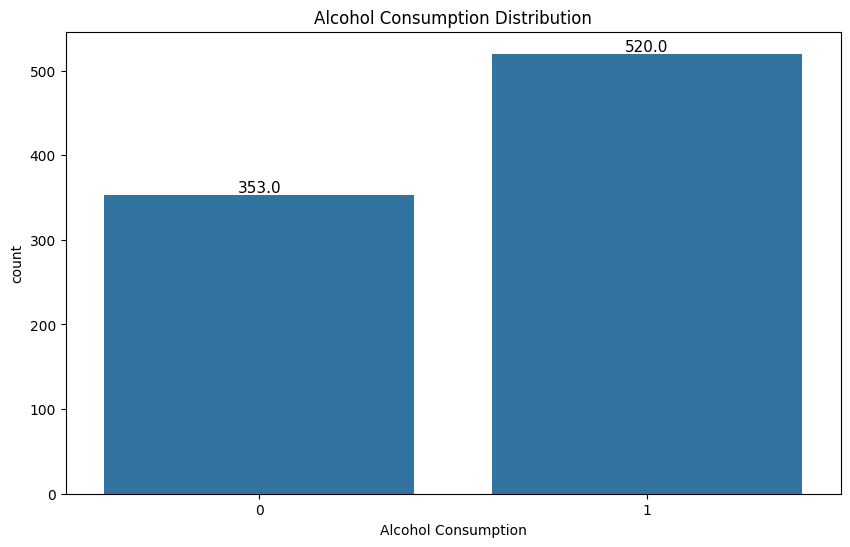

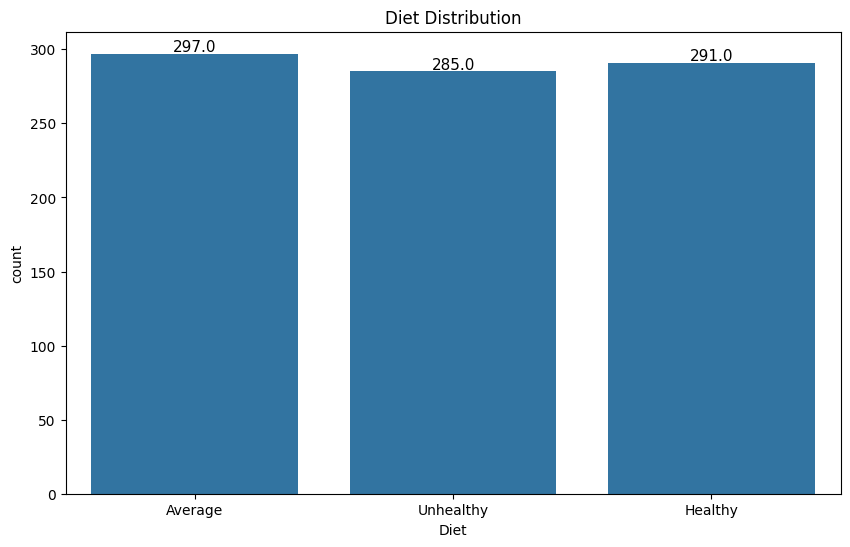

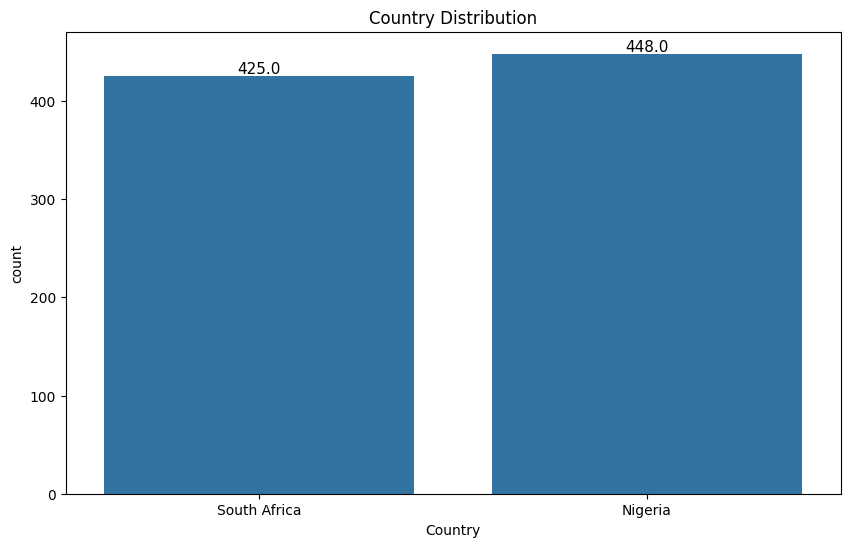

In [27]:
for col in ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Country']:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    sns.countplot(x=col, data=df2)
    plt.title(f'{col} Distribution')

    # Add value counts on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.show()

**c. Distribution of Age**

Text(0.5, 1.0, 'Distribution of Age')

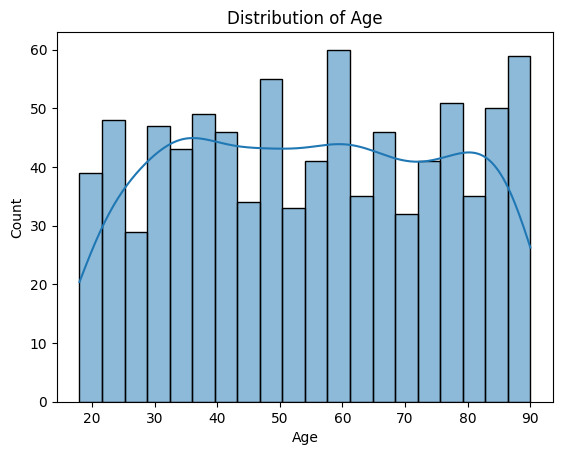

In [28]:
sns.histplot(df2['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

**d. Distribution of Income**

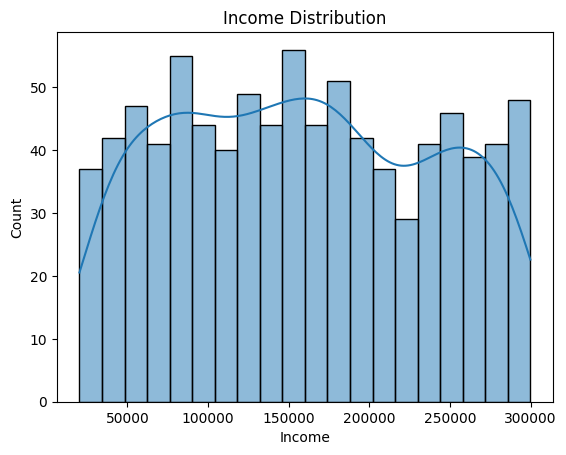

In [29]:
#Income Distribution
sns.histplot(df2['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.show()

**e. Distribution of physical Activity Days Per Week**

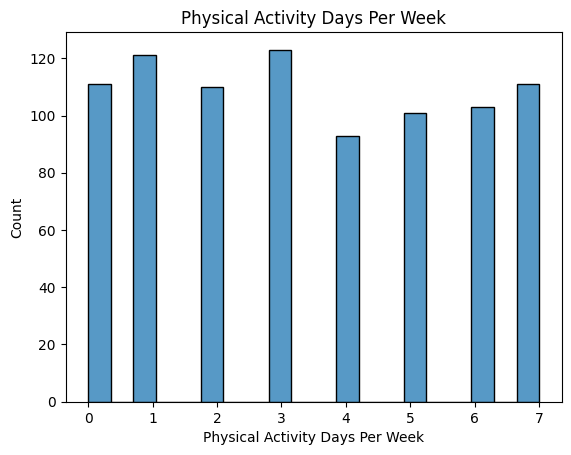

In [30]:
#Physical Activity Days Per Week
sns.histplot(df2['Physical Activity Days Per Week'], bins=20)
plt.title('Physical Activity Days Per Week')
plt.show()

## **2. Bivariate Analysis**

**a. Age v Hypertension Prevalence**

In [31]:
#we place the ages into categories
age_bins = [18, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

df2['Age_Category'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

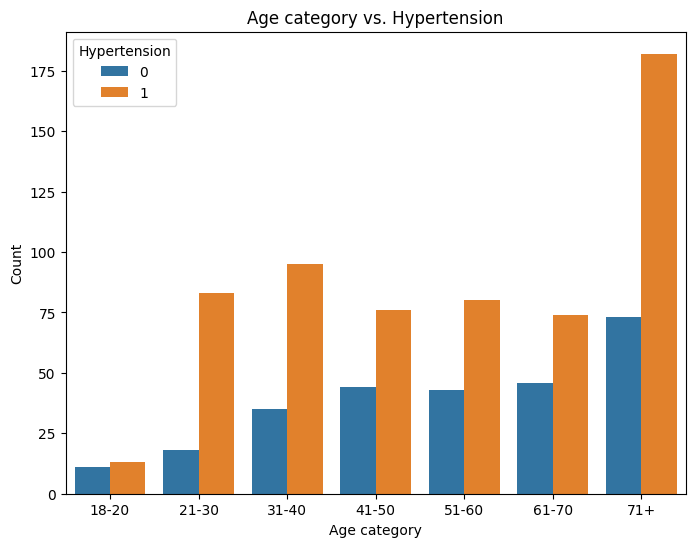

Value Counts:
   Age_Category  Hypertension  Count
0         18-20             0     11
1         18-20             1     13
2         21-30             0     18
3         21-30             1     83
4         31-40             0     35
5         31-40             1     95
6         41-50             0     44
7         41-50             1     76
8         51-60             0     43
9         51-60             1     80
10        61-70             0     46
11        61-70             1     74
12          71+             0     73
13          71+             1    182


C:\Temp\ipykernel_40952\1519413372.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = df2.groupby(['Age_Category', 'Hypertension']).size().reset_index(name='Count')


In [32]:
#Age category vs. Hypertension Prevelance
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='Age_Category', hue='Hypertension')
plt.title('Age category vs. Hypertension')
plt.xlabel('Age category')
plt.ylabel('Count')
plt.show()

value_counts = df2.groupby(['Age_Category', 'Hypertension']).size().reset_index(name='Count')
print("Value Counts:")
print(value_counts)

**b. Binary Variables v Hypertension Prevelance**

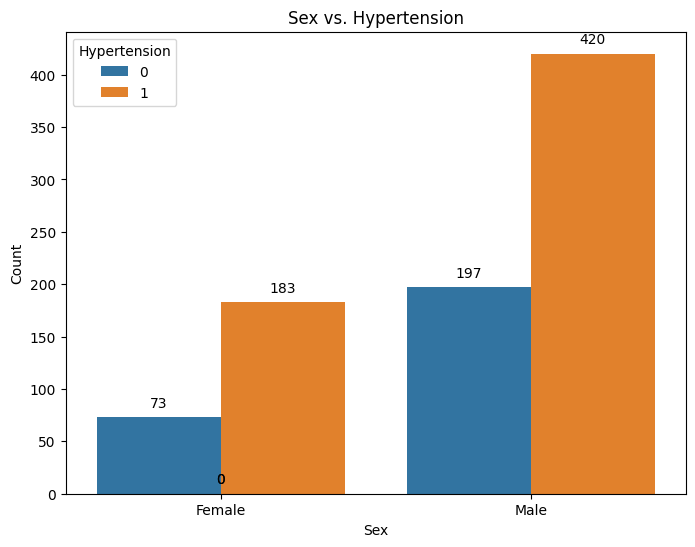

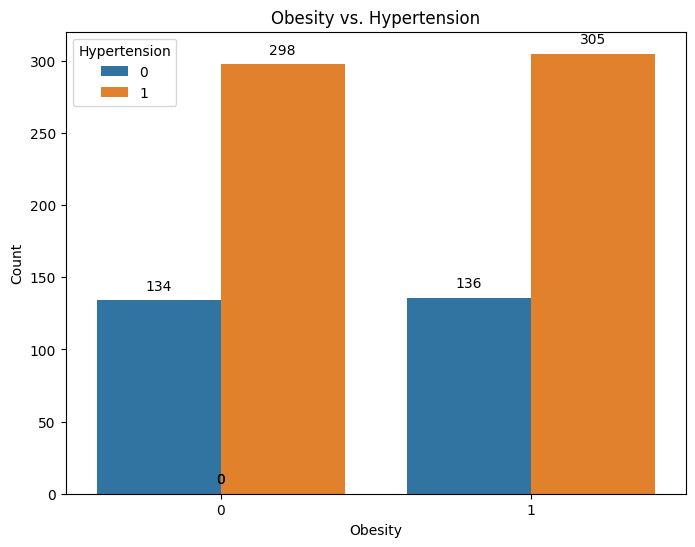

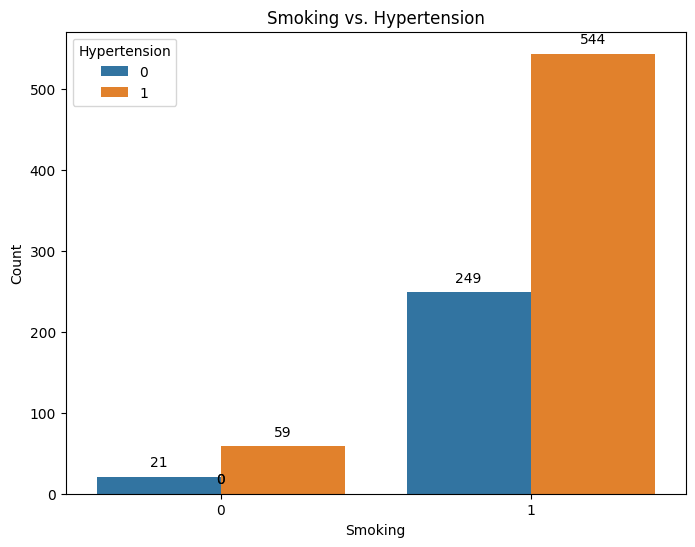

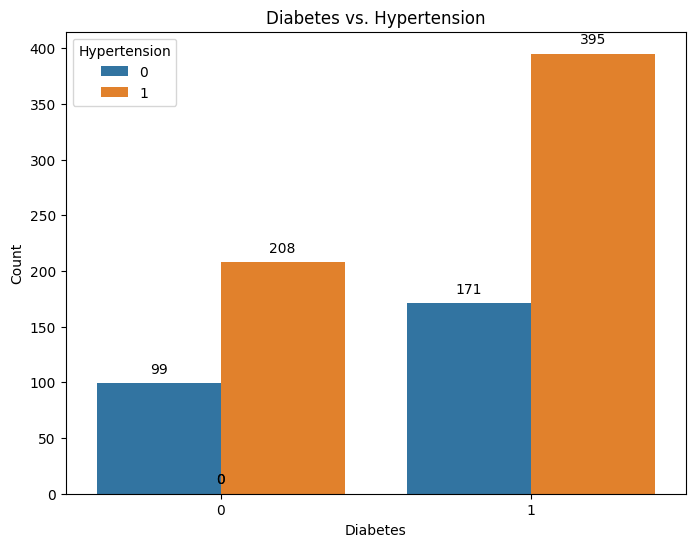

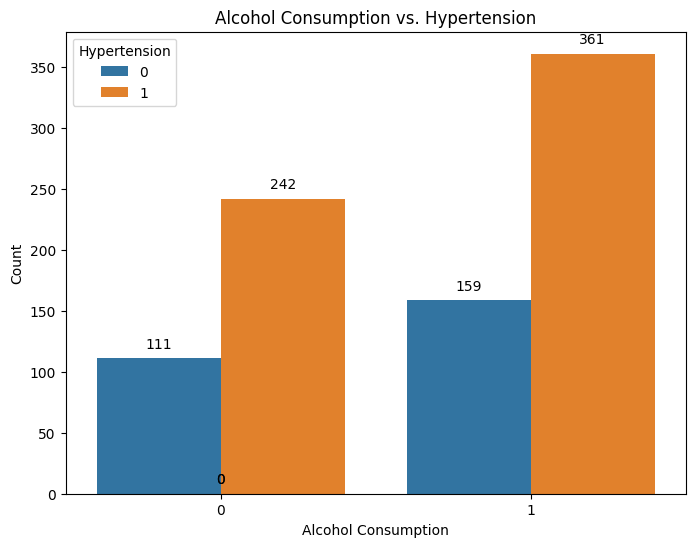

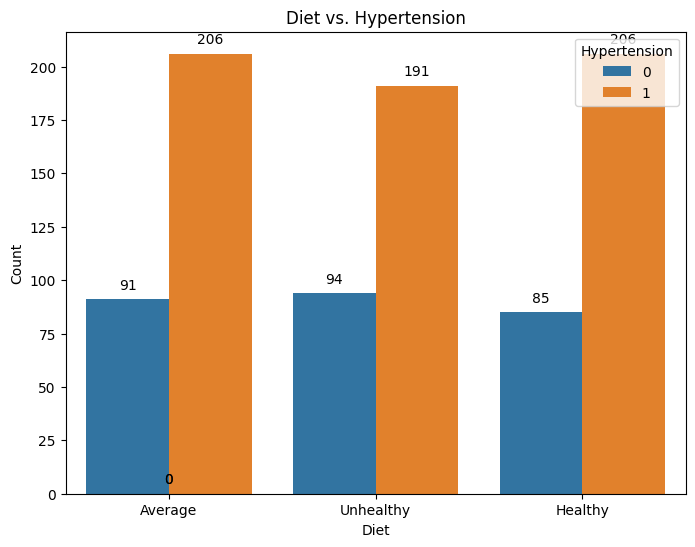

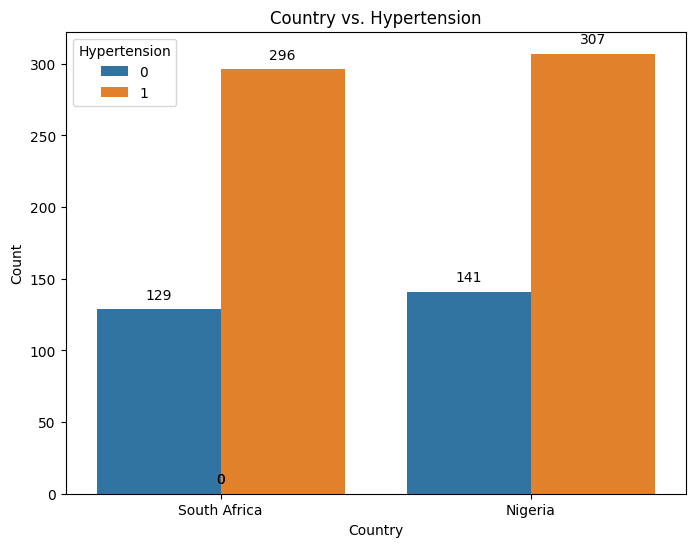

In [33]:
#we define a function that compares binary variables against their respective hypertension prevelance
def plot_health_data(df2, x_variable, hue_variable):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=x_variable, hue=hue_variable)

    # Add counts on top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'{x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.show()

#we implement the function
plot_health_data(df2, 'Sex', 'Hypertension')
plot_health_data(df2, 'Obesity', 'Hypertension')
plot_health_data(df2, 'Smoking', 'Hypertension')
plot_health_data(df2, 'Diabetes', 'Hypertension')
plot_health_data(df2, 'Alcohol Consumption', 'Hypertension')
plot_health_data(df2, 'Diet', 'Hypertension')
plot_health_data(df2, 'Country', 'Hypertension')

**c. Heatmap of Sex v Diet**

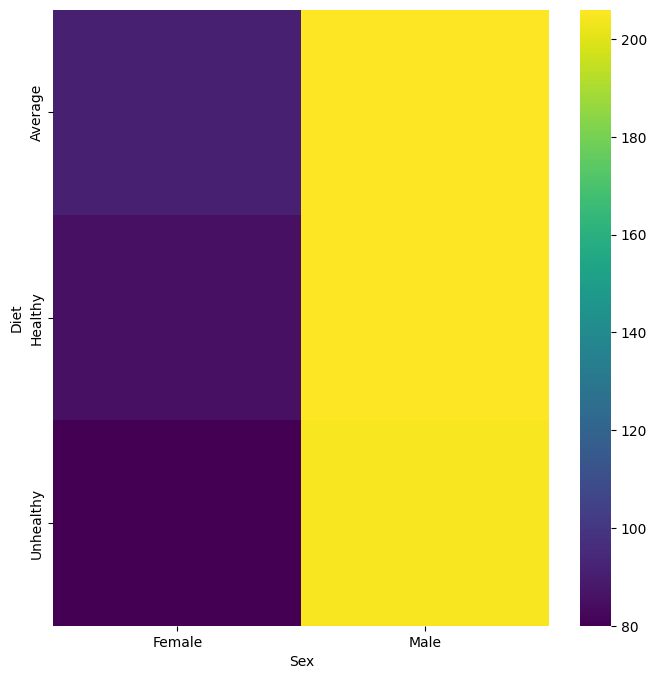

In [34]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Diet'].value_counts()
    for x_label, grp in df2.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Diet')

**d. Violin plot of Diet v Age**

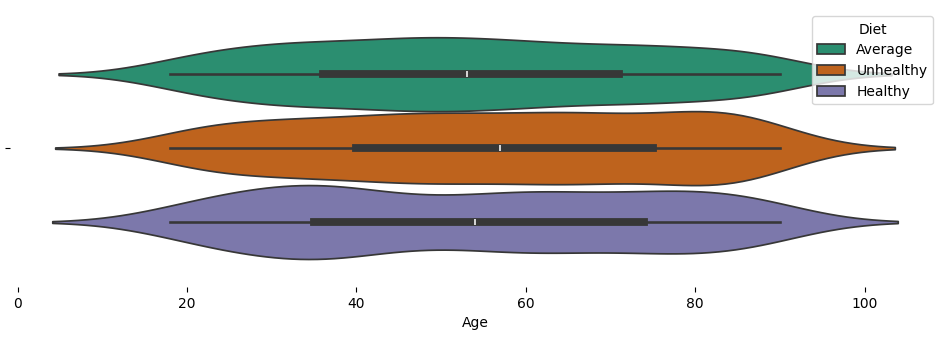

In [35]:
figsize = (12, 1.2 * len(df2['Diet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='Age', hue='Diet', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**e. Violin Plot of Sex V Age**

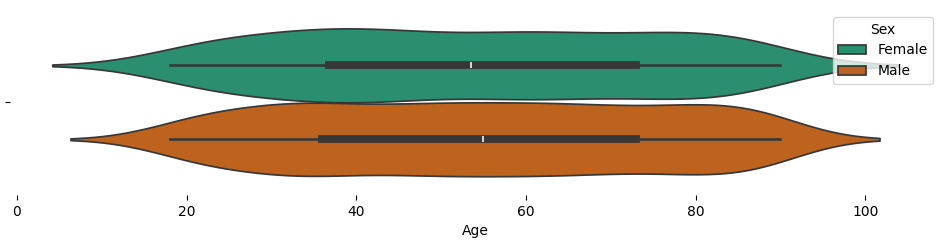

In [36]:
figsize = (12, 1.2 * len(df2['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='Age', hue='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **3. Multivariate Analysis**

**a. Pair Plot for Numeric Features V Hypertension**

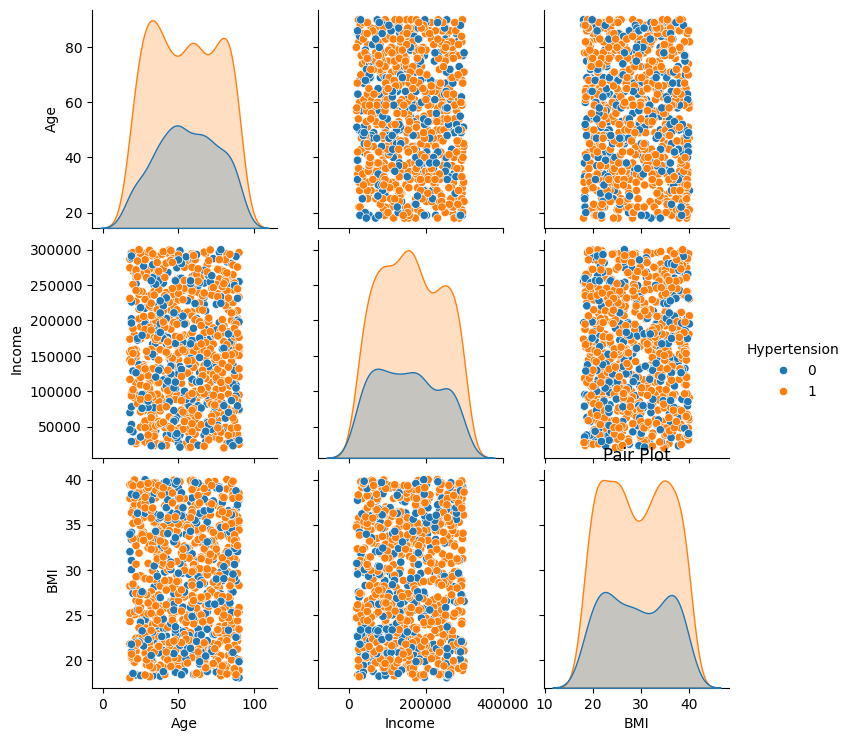

<Figure size 640x480 with 0 Axes>

In [37]:
sns.pairplot(data=df2, vars=['Age', 'Income','BMI'], hue='Hypertension')
plt.title('Pair Plot')
plt.show()
plt.tight_layout()

**b. Correlation Matrix of Numerical Features**

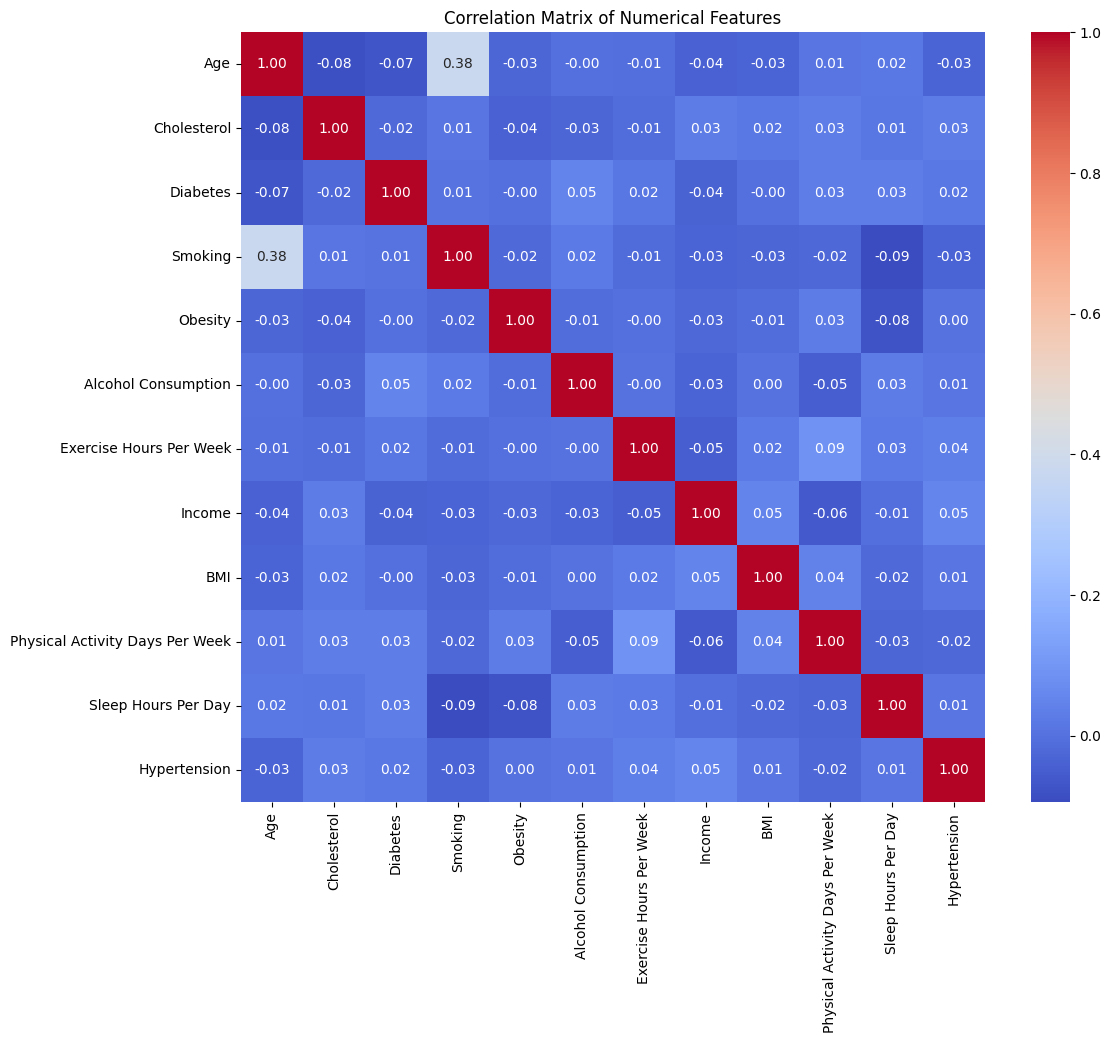

In [38]:
#we define a function to plot a correlation matrix for numerical features
def plot_correlation_matrix(df):

    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    #we calculate correlation matrix
    corr_matrix = numerical_features.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

#we use the function to plot the correlation matrix for df2
plot_correlation_matrix(df2)

The correlation matrix, which we discussed earlier, provides insights into the strength and direction of the linear relationship between pairs of variables. Here’s how to interpret the values found in a correlation matrix:

1. **Value Range:**
   - **-1.0** indicates a perfect negative linear relationship.
   - **0.0** indicates no linear relationship.
   - **+1.0** indicates a perfect positive linear relationship.

2. **Strength of the Correlation:**
   - Values closer to -1.0 or +1.0 suggest a stronger relationship.
   - Values close to 0 suggest a weak relationship.

3. **Direction of the Correlation:**
   - Positive values indicate that as one variable increases, the other variable tends to increase as well.
   - Negative values indicate that as one variable increases, the other variable tends to decrease.

### Specific Observations from Our Correlation Matrix:
- Features like `BMI` and `Cholesterol` had positive correlations with `Hypertension`, suggesting that higher values of these metrics are associated with a higher likelihood of having hypertension. These relationships are biologically plausible since high BMI and cholesterol levels are known risk factors for hypertension.
- `Heart Rate` and physical activity metrics showed weaker correlations with `Hypertension`. This might suggest that these features, by themselves, do not strongly predict hypertension, or their effects might be more nuanced and not purely linear, possibly requiring more complex modeling to capture any predictive power.
- Correlations among other features (like `Income` or `Stress Level`) with hypertension were also weak, indicating that they may not directly contribute to predicting hypertension when considered alone in a linear context.

### Implications for Model Building:
- Strongly correlated features might be primary candidates for inclusion in predictive models.
- Features with very low correlations might still be included if they are believed to provide unique or complementary information not captured by other features. For example, even though `Heart Rate` has a low correlation, it might interact with other variables in ways that are important.
- We need to be cautious about multicollinearity (high correlation between independent variables), as it can destabilize the model. If some independent variables are highly correlated, we might consider removing one or combining them somehow.

Given these insights, the next steps would involve deciding how to incorporate these variables into a predictive model, possibly exploring non-linear relationships or interactions, and considering advanced modeling techniques that can handle complexities in the data.

The correlation matrix in the image you provided visualizes the relationship between different features and their correlation to hypertension. Here's a breakdown of what the different elements in this matrix mean:

- **Color Intensity and Direction**: The intensity of the red and blue colors indicates the strength of the correlation. Red suggests a positive correlation, where as one feature increases, so does the other. Blue indicates a negative correlation, where as one feature increases, the other decreases.
- **Numbers on the Matrix**: These represent the correlation coefficient values ranging from -1 to 1. Values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values around 0 indicate no correlation.
- **Relation to Hypertension**:
  - **Age**: The correlation coefficient with hypertension is -0.03, indicating a very weak negative correlation, which suggests that there's hardly any linear relationship between age and hypertension in this dataset.
  - **Cholesterol**: The correlation coefficient with hypertension is 0.02, suggesting no meaningful relationship.
  - **Diabetes**: The correlation coefficient with hypertension is -0.03, again indicating a negligible negative correlation.
  - **Smoking**: Shows a correlation coefficient of 0.01 with hypertension, which is a very weak positive correlation.
  - **Obesity**: There is a correlation coefficient of 0.04, a weak positive correlation with hypertension.
  - **Alcohol Consumption**: Has a correlation coefficient of 0.01 with hypertension, indicating an extremely weak positive correlation.
  - **Exercise Hours Per Week**: Shows a -0.03 correlation coefficient with hypertension, indicating a very weak negative correlation.
  - **Income**: Has a 0.04 correlation coefficient with hypertension, suggesting a weak positive correlation.
  - **BMI**: The correlation coefficient with hypertension is 0.01, indicating a very weak positive correlation.
  - **Physical Activity Days Per Week**: There's a -0.02 correlation coefficient with hypertension, which is a negligible negative correlation.
  - **Sleep Hours Per Day**: Has a correlation coefficient of 0.01 with hypertension, indicating a very weak positive correlation.

**Summary**: Based on the correlation coefficients, none of the features show a strong correlation with hypertension in the provided data. Most values are very close to zero, suggesting no clear linear relationship. It's important to note that correlation does not imply causation, and these results do not mean that changes in these features will cause changes in hypertension. Moreover, some relationships might be non-linear or influenced by other factors not included in this matrix.

**c. Histogram Gridplot for all Numeric Variables**

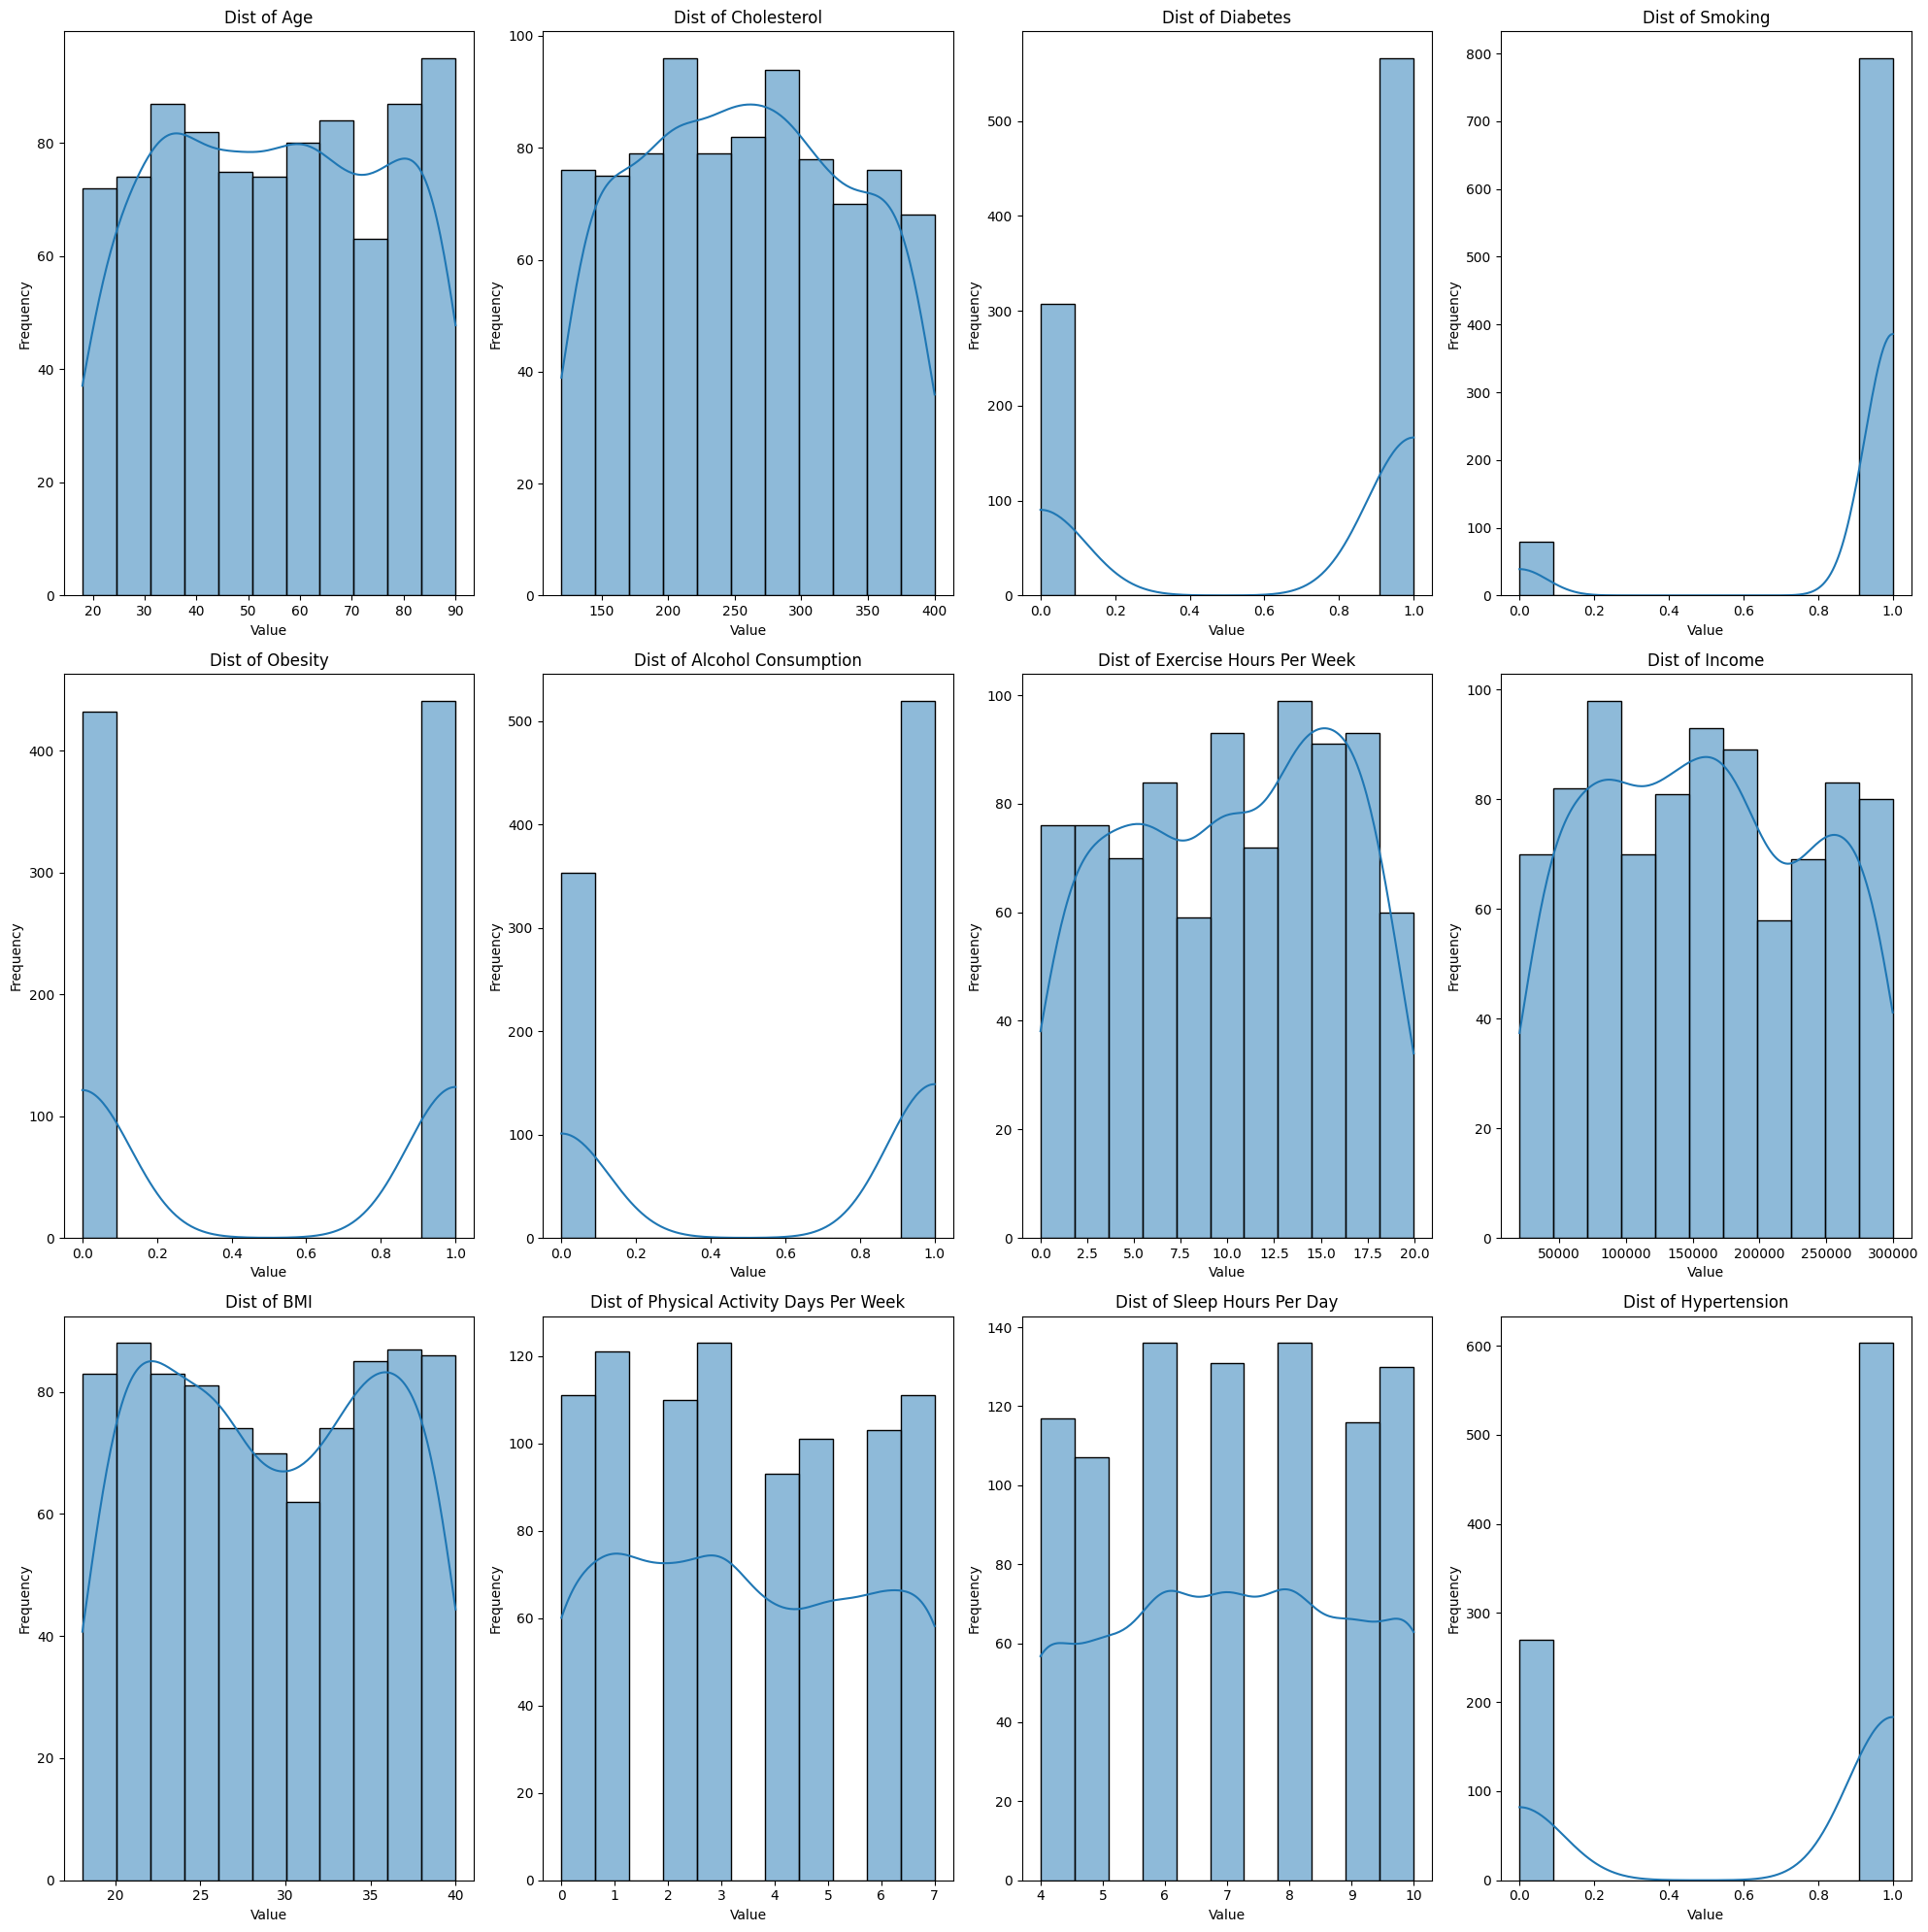

In [39]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

for ax, col in zip(axs.ravel(), df2.select_dtypes(include='number').columns):
    sns.histplot(df2[col], kde=True, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dist of {col}')


plt.tight_layout()
plt.show()

# **2. DATA PREPROCESSING**

In [40]:
df2.head()

,Age,Sex,Cholesterol,Blood Pressure,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Hypertension,Age_Category
10,73,Female,373,107/69,1,1,0,1,16.841988,Average,50030,22.867911,0,4,South Africa,0,71+
32,27,Male,321,111/91,1,1,1,0,0.759440,Unhealthy,53345,34.196492,7,8,Nigeria,1,21-30
58,74,Male,285,151/85,1,1,0,1,5.575382,Unhealthy,35855,39.783909,6,10,Nigeria,1,71+
62,90,Female,139,179/93,0,1,1,1,1.713099,Average,73167,28.277305,7,9,South Africa,1,71+
72,22,Male,398,174/93,1,1,0,0,18.422302,Average,259754,39.413213,3,6,Nigeria,1,21-30


In [41]:
df2.reset_index(drop=True, inplace=True)

In [42]:
df2.head()

,Age,Sex,Cholesterol,Blood Pressure,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Hypertension,Age_Category
0,73,Female,373,107/69,1,1,0,1,16.841988,Average,50030,22.867911,0,4,South Africa,0,71+
1,27,Male,321,111/91,1,1,1,0,0.759440,Unhealthy,53345,34.196492,7,8,Nigeria,1,21-30
2,74,Male,285,151/85,1,1,0,1,5.575382,Unhealthy,35855,39.783909,6,10,Nigeria,1,71+
3,90,Female,139,179/93,0,1,1,1,1.713099,Average,73167,28.277305,7,9,South Africa,1,71+
4,22,Male,398,174/93,1,1,0,0,18.422302,Average,259754,39.413213,3,6,Nigeria,1,21-30


**We convert categorical variables (Sex, Diet, Country) to numerical variables for machine learning purposes, using label encoding.**

In [43]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder
df2['Sex'] = label_encoder.fit_transform(df['Sex'])
df2['Diet'] = label_encoder.fit_transform(df['Diet'])
df2['Country'] = label_encoder.fit_transform(df['Country'])

**We drop Blood Pressure & Age Category since they are no longer relevant.**

In [44]:
df2.drop('Blood Pressure', axis=1, inplace=True)

In [45]:
df2.drop('Age_Category', axis=1, inplace=True)

**We preview our data again.**

In [46]:
df2.head()

,Age,Sex,Cholesterol,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Hypertension
0,73,0,373,1,1,0,1,16.841988,0,50030,22.867911,0,4,1,0
1,27,1,321,1,1,1,0,0.759440,2,53345,34.196492,7,8,0,1
2,74,1,285,1,1,0,1,5.575382,2,35855,39.783909,6,10,0,1
3,90,0,139,0,1,1,1,1.713099,0,73167,28.277305,7,9,1,1
4,22,1,398,1,1,0,0,18.422302,0,259754,39.413213,3,6,0,1


**We separate our target variable (Hypertension) and the independent variables (predictors).**

In [47]:
# Separate predictor and target variable
X = df2.drop(["Hypertension"], axis = 1)
y = df2['Hypertension']

**We split the data into training & testing set, in the ratio 80/20.**

In [48]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **3. MODELLING**

## **Model 1(Baseline Model): Logistic Regression**

We chose this because this is a classification problem.

In [49]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("confusion matrix: \n", confusion_matrix(y_test, predictions))

Accuracy: 0.7485714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.75      1.00      0.86       131

    accuracy                           0.75       175
   macro avg       0.37      0.50      0.43       175
weighted avg       0.56      0.75      0.64       175

confusion matrix: 
 [[  0  44]
 [  0 131]]


c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classificatio

Even though this model performed well on certain metrics such as Accuracy, it perfromed poorly on others such as Recall and the Confusion Matrix.
This coould possibly have been caused by imbalance in the dataset.
Therefore, we decided to undertake oversampling.

RandomOverSampler: This technique is used to handle class imbalance by oversampling the minority class. It generates synthetic samples from the minority class to balance the class distribution.

Why it's Important:

Class Imbalance Handling: Class imbalance is a common issue in classification tasks where one class (majority class) significantly outnumbers the other class (minority class). Ignoring class imbalance can lead to biased models that perform poorly on the minority class. By oversampling the minority class, this code ensures that the model receives enough information to learn from both classes adequately.

### **Oversampling**

We handle the oversampling then split the data afresh.

In [50]:
# Handling class imbalance by oversampling
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

**We run the logistic regression model again.**

In [51]:
# Initialize and train a logistic regression model with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))

Accuracy: 0.4834710743801653
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.43      0.44       114
           1       0.51      0.53      0.52       128

    accuracy                           0.48       242
   macro avg       0.48      0.48      0.48       242
weighted avg       0.48      0.48      0.48       242

Confusion Matrix: 
 [[49 65]
 [60 68]]


c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model improved on certain metrics such as Recall and the Confusion Matrix. However, it decreased its score in other such as the Accuracy.
Therefore, we proceeded to create further models.

## **Model 2: KNN (K-Nearest Neighbors) Classifier**

In [52]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("\nK-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))



K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.5909090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.60       114
           1       0.63      0.55      0.59       128

    accuracy                           0.59       242
   macro avg       0.59      0.59      0.59       242
weighted avg       0.60      0.59      0.59       242

Confusion Matrix:
 [[73 41]
 [58 70]]


This model performed better than the logistic regression. However there is still room for improvement.

## **Model 2: Decision Tree Classifier**

In [53]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Classifier:
Accuracy: 0.6859504132231405
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.89      0.73       114
           1       0.84      0.50      0.63       128

    accuracy                           0.69       242
   macro avg       0.73      0.70      0.68       242
weighted avg       0.73      0.69      0.68       242

Confusion Matrix:
 [[102  12]
 [ 64  64]]


This model increased in perfomance on various metrics such as Accuracy. However, there is still room for improvement.

## **Model 3: Random Forest Classifier**

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.8388429752066116
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       114
           1       0.86      0.83      0.84       128

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242

Confusion Matrix:
 [[ 97  17]
 [ 22 106]]


This model gave the best performance so far.
However, we created more advanced models to find the best model.

## **Model 4: Support Vector Machine (SVM) Classifier**

In [55]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Support Vector Machine (SVM) Classifier:
Accuracy: 0.4669421487603306
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.49      0.46       114
           1       0.50      0.45      0.47       128

    accuracy                           0.47       242
   macro avg       0.47      0.47      0.47       242
weighted avg       0.47      0.47      0.47       242

Confusion Matrix:
 [[56 58]
 [71 57]]


In [56]:
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.43      0.44       114
           1       0.51      0.53      0.52       128

    accuracy                           0.48       242
   macro avg       0.48      0.48      0.48       242
weighted avg       0.48      0.48      0.48       242



This model performed very poorly compared to all other models.

## **Model 4: Gradient Boosting (XG) Classifier**

In [57]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))


Gradient Boosting Classifier:
Accuracy: 0.6694214876033058
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68       114
           1       0.73      0.60      0.66       128

    accuracy                           0.67       242
   macro avg       0.68      0.67      0.67       242
weighted avg       0.68      0.67      0.67       242

Confusion Matrix:
 [[85 29]
 [51 77]]


This performed better than SVM but worse than Random Forest.

## **Model 5: AdaBoost Classifier**

In [58]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

print("\nAdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, ada_predictions))
print("Classification Report:\n", classification_report(y_test, ada_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_predictions))


AdaBoost Classifier:
Accuracy: 0.5619834710743802
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       114
           1       0.59      0.59      0.59       128

    accuracy                           0.56       242
   macro avg       0.56      0.56      0.56       242
weighted avg       0.56      0.56      0.56       242

Confusion Matrix:
 [[61 53]
 [53 75]]


c:\Users\Grey 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


This model is good as it filters out noise from the dataset. However, it performed worse than the Decision Trees and Random Forest models.

## **Hypertuning the best model: Random Forest**

We perform a grid search to find the best parameters for our Random Forest model.

In [59]:
# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # More estimators may be better, but take longer to compute
    'max_depth': [None, 10, 20, 30],  # None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # The minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],      # Whether bootstrap samples are used when building trees
    'class_weight': [None, 'balanced']
}

# Initialize the classifier
rfh = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfh, param_grid=param_grid, cv=3, verbose=2, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("\nRandom Forest Classifier with Grid Search:")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.7302780518952806

Random Forest Classifier with Grid Search:
Accuracy: 0.8553719008264463
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       114
           1       0.85      0.88      0.86       128

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242

Confusion Matrix:
 [[ 95  19]
 [ 16 112]]


# **4. DEPLOYMENT OF MODEL**

## **Pickling the model for deployment**

In [60]:
import pickle

# Save the model to disk
filename = 'finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

In [61]:
pip install streamlit

   ---------------------------------------- 0.0/8.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.5 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/8.5 MB 1.2 MB/s eta 0:00:08
    --------------------------------------- 0.2/8.5 MB 1.2 MB/s eta 0:00:07
   - -------------------------------------- 0.2/8.5 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.5 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.5 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/8.5 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.4/8.5 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/8.5 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/8.5 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/8.5 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.7/8.5 MB 1.2 MB/s eta 0:00:07
   --- ------------